## Data Description

### mimic_all.csv

This file includes the metadata from MIMIC-CXR and labels from MIMIC-CXR-JPG. The labels are for reference purposes only. The columns are:
- _subject_id:_ subject id in MIMIC-CXR
- _study_id:_ study_id in MIMIC-CXR
- _labels:_ This section contains the labels that were extracted from MIMIC-CXR-JPG, but they are only for reference purposes.
    - Atelectasis
    - Cardiomegaly
    - Consolidation
    - Edema
    - Enlarged Cardiomediastinum
    - Fracture
    - Lung Lesion
    - Lung Opacity
    - Pleural Effusion
    - Pneumonia
    - Pneumothorax
    - Pleural Other
    - Support Devices
    - No Finding
- _dicom_id:_ dicom_id in MIMIC-CXR
- _view:_ "PA" or "AP" view of the image
- _split:_ train/val/test split used in MIMIC-CXR-JPG. It is only for reference purposes.
- _study_date:_ 
    - StudyDate in MIMIC-CXR-JPG. Each patient was also assigned a date shift which mapped their first index admission year to a year between 2100 - 2200. This ensures anonymity of the data while preserving the relative chronology of patient information, which is crucial for appropriate processing of the data.
- _study_order:_ 
    - an integer that indicates the order number of a patient's entire visit history. Each patient may have multiple visits, but we select only two visits for pair comparison in order to create the final difference VQA dataset.


### mimic_pairs.csv
This is the final generated question-answer pairs of the difference VQA dataset. The columns include the following:
- study_id: main study_id in MIMIC-CXR.
- subject_id: subject id in MIMIC-CXR.
- ref_id: reference study_id in MIMIC-CXR.
- question_type: abnormality/location/level/view/type/presence/difference.
- question
- answer
- split: train/val/test split.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

data_path = 'data/medical-diff-vqa-1.0.1'
vqa_file = 'mimic_pair_questions.csv'
metadata_file = 'mimic_all.csv'

(700703, 7)

In [ ]:
vqa_df = pd.read_csv(os.path.join(data_path, vqa_file))
vqa_df.shape

In [2]:
vqa_df.head(10)

,study_id,subject_id,ref_id,question_type,question,answer,split
0,55088298,18936629,54989200,abnormality,what abnormalities are seen in the soft tissues?,atelectasis,train
1,55088298,18936629,54989200,presence,is there edema?,no,train
2,55088298,18936629,54989200,location,is the atelectasis located on the left side or...,left side,train
3,55088298,18936629,54989200,level,what level is the pneumothorax?,minimal,train
4,55088298,18936629,54989200,difference,what has changed compared to the reference image?,the main image has an additional finding of pn...,train
5,51480826,18936629,50632107,abnormality,what abnormalities are seen in this image?,"pleural effusion, pneumothorax, atelectasis, l...",train
6,51480826,18936629,50632107,presence,is there pneumothorax in the right apical area?,no,train
7,51480826,18936629,50632107,location,where is the pneumothorax?,left apical area,train
8,51480826,18936629,50632107,level,what level is the pleural effusion?,small,train
9,50632107,18936629,51480826,difference,what has changed compared to the reference image?,the main image has additional findings of cons...,train


In [3]:
vqa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700703 entries, 0 to 700702
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   study_id       700703 non-null  int64 
 1   subject_id     700703 non-null  int64 
 2   ref_id         700703 non-null  int64 
 3   question_type  700703 non-null  object
 4   question       700703 non-null  object
 5   answer         700703 non-null  object
 6   split          700703 non-null  object
dtypes: int64(3), object(4)
memory usage: 37.4+ MB


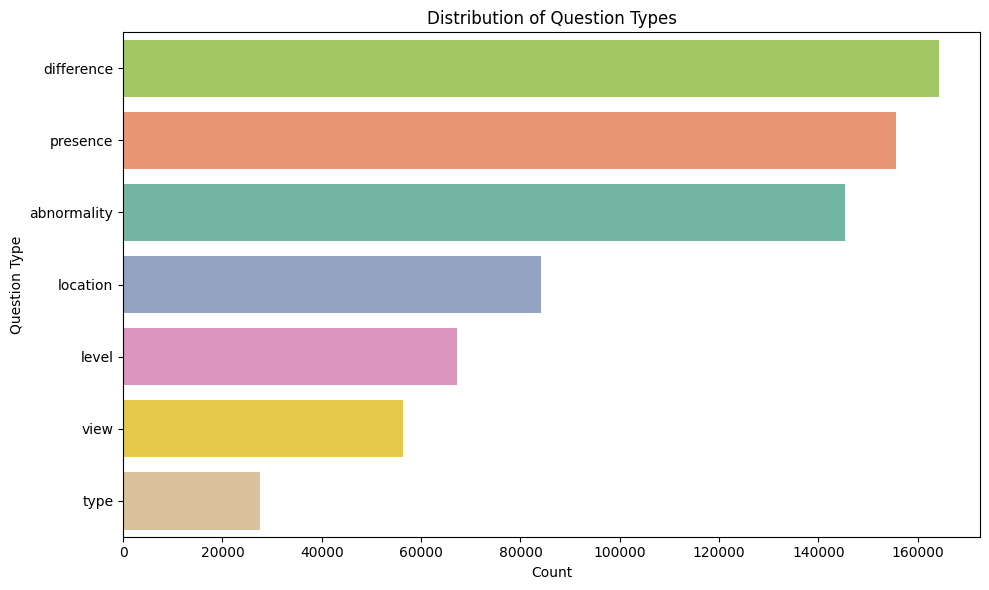

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(y='question_type', data=vqa_df, order=vqa_df['question_type'].value_counts().index, palette='Set2', hue='question_type')
plt.title('Distribution of Question Types')
plt.xlabel('Count')
plt.ylabel('Question Type')
plt.savefig('figures/question_type_distribution.png')
plt.tight_layout()
plt.show()

In [5]:
vqa_df['question_length'] = vqa_df['question'].str.len()
vqa_df['answer_length'] = vqa_df['answer'].str.len()

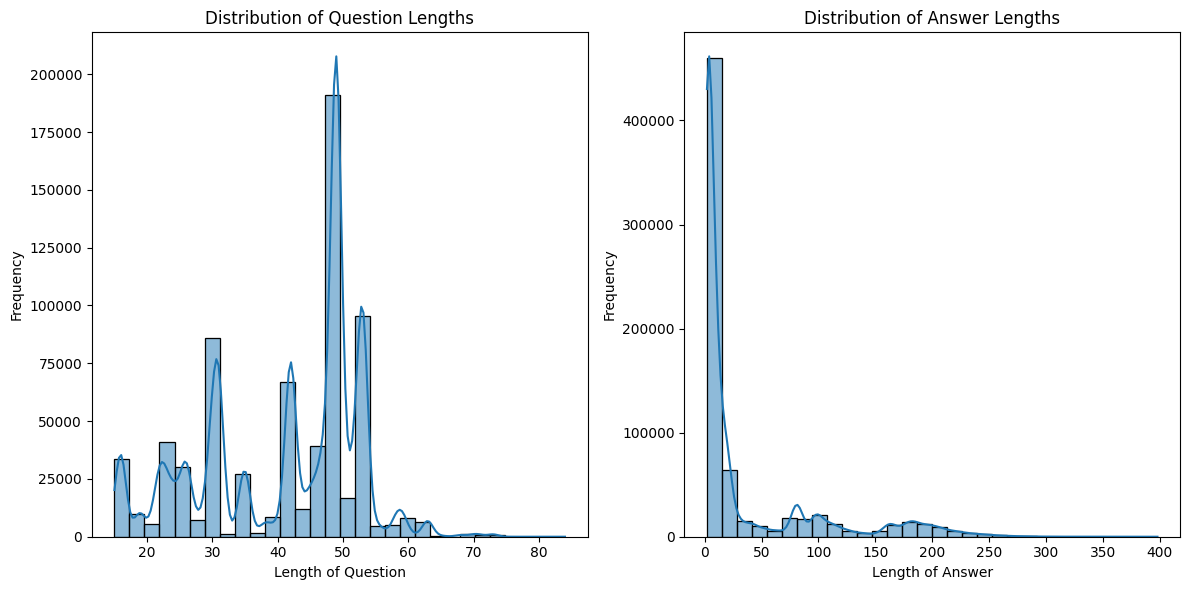

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(vqa_df['question_length'], bins=30, kde=True)
plt.title('Distribution of Question Lengths')
plt.xlabel('Length of Question')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(vqa_df['answer_length'], bins=30, kde=True)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Length of Answer')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('figures/qa_length_distribution.png')
plt.show()

In [ ]:
metadata_df = pd.read_csv(os.path.join(data_path, metadata_file))
metadata_df.shape

(227827, 21)

In [8]:
metadata_df.head(10)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,dicom_id,view,split,study_date,study_order
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,postero-anterior,train,21800506,1.0
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,postero-anterior,train,21800626,2.0
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,antero-posterior,train,21800723,3.0
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,antero-posterior,train,21800805,4.0
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.0,NaN,NaN,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,antero-posterior,train,21321015,1.0
5,10000898,50771383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2a280266-c8bae121-54d75383-cac046f4-ca37aa16,postero-anterior,train,21880312,2.0
6,10000898,54205396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,b75df1bd-0f22d631-52d73526-2ae7b85a-d843b39d,postero-anterior,train,21880113,1.0
7,10000935,50578979,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,...,1.0,NaN,1.0,NaN,NaN,d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738,antero-posterior,train,21871016,6.0
8,10000935,51178377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,-1.0,NaN,NaN,9b314ad7-fbcb0422-6db62dfc-732858d0-a5527d8b,antero-posterior,train,21870823,4.0
9,10000935,55697293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,c50494f1-90e2bff5-e9189550-1a4562fd-6ab5204c,postero-anterior,train,21870226,2.0


In [9]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227827 entries, 0 to 227826
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   subject_id                  227827 non-null  int64  
 1   study_id                    227827 non-null  int64  
 2   Atelectasis                 57666 non-null   float64
 3   Cardiomegaly                66799 non-null   float64
 4   Consolidation               23076 non-null   float64
 5   Edema                       65833 non-null   float64
 6   Enlarged Cardiomediastinum  21837 non-null   float64
 7   Fracture                    5831 non-null    float64
 8   Lung Lesion                 8287 non-null    float64
 9   Lung Opacity                58425 non-null   float64
 10  No Finding                  75455 non-null   float64
 11  Pleural Effusion            87272 non-null   float64
 12  Pleural Other               2902 non-null    float64
 13  Pneumonia     

In [10]:
label_columns = [
    'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
    'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity',
    'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia',
    'Pneumothorax', 'Support Devices'
]

findings_prevalence = metadata_df[label_columns].apply(lambda x: (x == 1.0).sum())
findings_prevalence = findings_prevalence.sort_values(ascending=False)

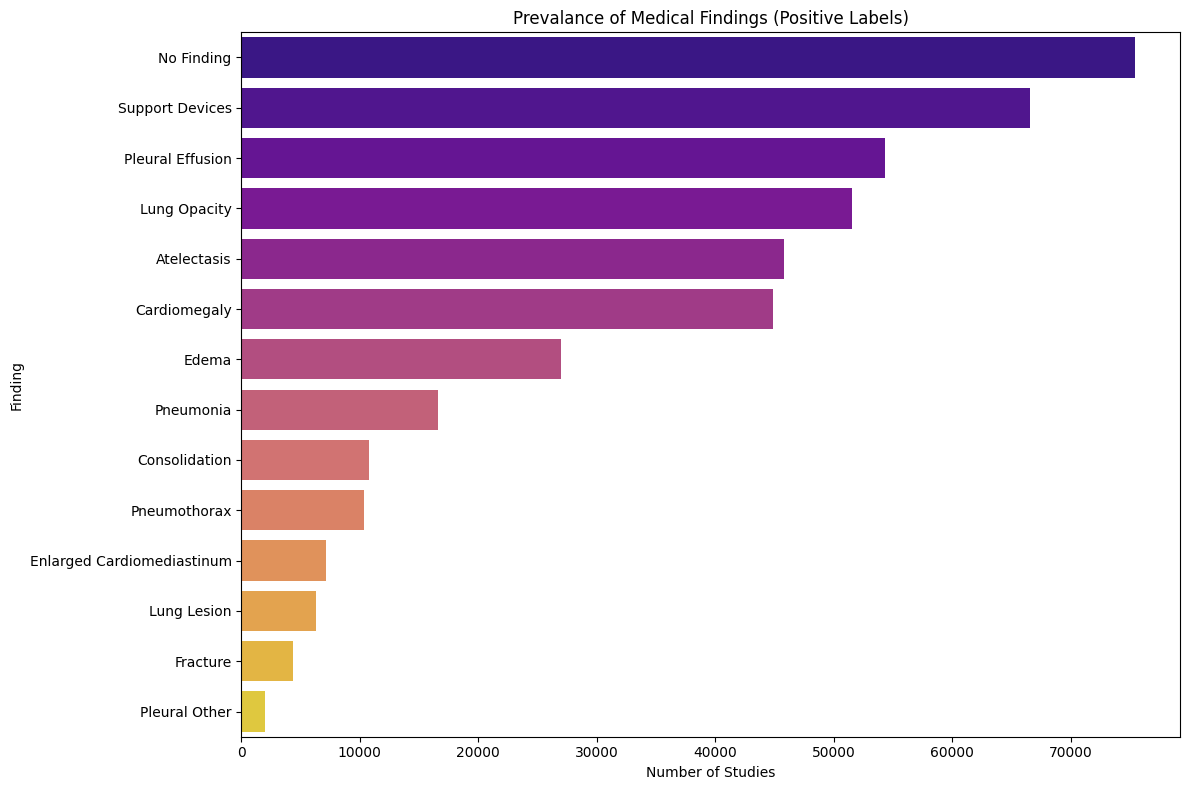

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x=findings_prevalence.values, y=findings_prevalence.index, palette='plasma', orient='h', hue=findings_prevalence.index)
plt.title('Prevalance of Medical Findings (Positive Labels)')
plt.xlabel('Number of Studies')
plt.ylabel('Finding')
plt.tight_layout()
plt.savefig('figures/findings_prevalence.png')
plt.show()

In [12]:
print("--- Analysis of Medical Findings ---")
print("Prevalence of each finding (Positive Labels):\n")
print(findings_prevalence)

--- Analysis of Medical Findings ---
Prevalence of each finding (Positive Labels):

No Finding                    75455
Support Devices               66558
Pleural Effusion              54300
Lung Opacity                  51525
Atelectasis                   45808
Cardiomegaly                  44845
Edema                         27018
Pneumonia                     16556
Consolidation                 10778
Pneumothorax                  10358
Enlarged Cardiomediastinum     7179
Lung Lesion                    6284
Fracture                       4390
Pleural Other                  2011
dtype: int64


C:\Users\neucl\AppData\Local\Temp\ipykernel_296\1983482109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='view', data=metadata_df, palette='cubehelix')


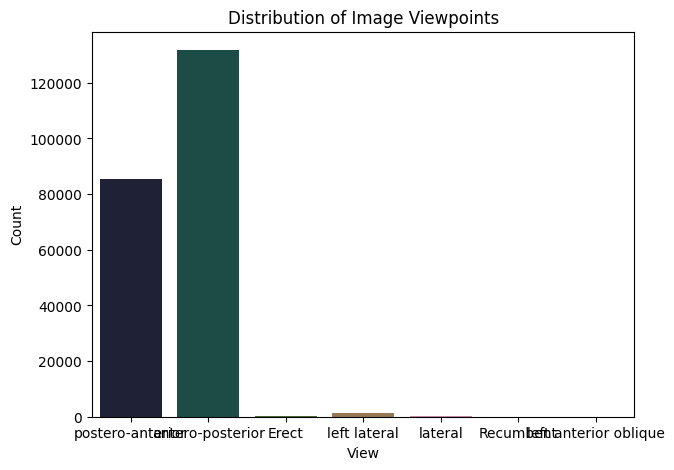

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(x='view', data=metadata_df, palette='cubehelix')
plt.title('Distribution of Image Viewpoints')
plt.xlabel('View')
plt.ylabel('Count')
plt.savefig('figures/viewpoint_distribution.png')
plt.show()